In [106]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot
import time
from tqdm import tqdm

# Platekondensatorer i Parallell
Denne oppgaven g ̊ar ut p ̊a  ̊a undersøke potensial og elektrisk felt for et oppsett med to platekondensatorer plassert parallelt i en jordet boks (se figur 1 under). Kondensatorene er holdt ved konstant potensial V = −1 (venstre kondensator) og V = +1 (høyre kon- densator), og er separert med en avstand d . Vi antar at tykkelsen p ̊a kondensatorene er neglisjerbar, og at de utstrekker seg fra y = −0.5 til y = 0.5. For  ̊a finne potensialet, og dermed kunne bestemme det elektriske feltet, m ̊a man løse Laplaces likning inne i boksen med de gitte betingelsene (se NumProg øving 3).
Figure 1: Illustrasjon av oppsettet. Koordinatene for den kvadratiske randen er avmerket mht. sentrum i boksen. Kryss-symbolet representerer observasjonspunktet brukt i siste deloppgave.


## a)

Løs Laplaces likning for d = 0.5 (dvs. kondesatorene plassert i x = ±0.25), og plott potensialet inne i boksen enten som heatmap eller 3d-overflate.

In [107]:
d = 15 # define distance from

def make_arena(d, V):
    N = 100
    x = np.linspace(-1,1,N)
    y = np.linspace(-1,1,N)
    xv, yv = np.meshgrid(x, -y)

    # make the capasitors
    arena = np.zeros([N,N])
    #arena[24:74, 50 - int((d)*100)] = -V
    arena[24:74, 50+d] = -V
    #arena[24:74, 50 + int((d)*100)] = V
    arena[24:74, 50-d] = V

    return arena, xv, yv


In [108]:
def make_arenas(d, V):
    N = 100
    x = np.linspace(-1,1,N)
    y = np.linspace(-1,1,N)
    xv, yv = np.meshgrid(x, y)

    # make the capasitors
    arena = np.zeros([N,N])
    #arena[24:74, 50 - int((d)*100)] = -V
    arena[24:74, 50+d] = -V
    #arena[24:74, 50 + int((d)*100)] = V
    arena[24:74, 50-d] = V

    return arena

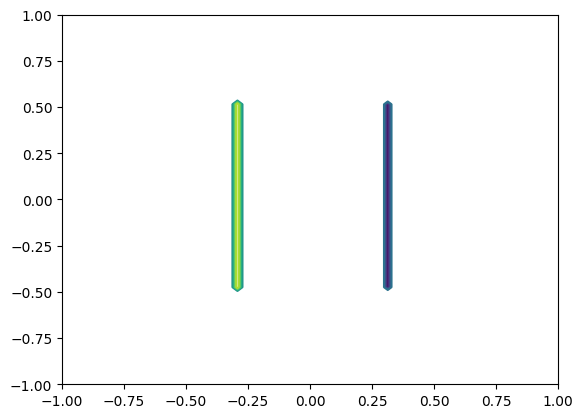

In [109]:
arena, xv, yv = make_arena(d, 1)
plt.contour(xv, yv, arena)

In [110]:
def SOR_step(V_k, N, omega, d):
    #Copy the old matrix
    V_new = np.copy(V_k)
    #Calculate 1-omega once instead of every time
    prefac = 1.0-omega
    #We want to itterate over every x-value except the boundaries (x=0,N-1)
    for i in np.arange(1,N-1):
        #We need to treat the top and the bottom rows as special cases because of the periodic boundary

        #We can loop over the middle rows
        for j in np.arange(1,N-1):
            V_new[j,i] = prefac*V_new[j,i] + (V_new[j,i-1] + V_new[j,i+1] + V_new[j-1,i] + V_new[j+1,i])*omega / 4.0
            if j < 74 and j > 24 and i == 50-d:
                V_new[j,i] = 1
            elif j < 74 and j > 24 and i == 50+d:
                V_new[j,i] = -1

            #elif j == 80 and i == 50:
                #V_new[j,i] = -2

    return V_new


def SOR(V_0, d, N, omega, tol):
    #Start by recording the start time
    start_time = time.time()
    #We now need a counter and two arrays to save the old and new version of V_k
    V_old = V_0
    V_new = SOR_step(V_old, N, omega, d)
    steps = 0
    #print(d)

    #Now we make a while loop where V_k is updated by using Jacobi-step until the numerical
    #requirement for convergence is satisfied
    while np.linalg.norm(V_new - V_old) > tol:
        V_old = np.copy(V_new)
        V_new = SOR_step(V_old, N, omega, d)
        steps += 1

    #Record the end-time
    end_time = time.time()

    return V_new, steps, end_time-start_time

In [111]:
def Gauss_Seidel_step(V_k, N, d):
    #Copy the old matrix
    V_new = np.copy(V_k)
    #We want to itterate over every x-value except the boundaries (x=0,N-1)
    for i in np.arange(1,N-1):
        #We can loop over the middle rows

        for j in np.arange(1,N-1):
            V_new[j,i] = (V_new[j,i-1] + V_new[j,i+1] + V_new[j-1,i] + V_new[j+1,i]) / 4.0
            if j < 60 and j > 10 and i == 50-d:
                V_new[j,i] = 1
            elif j < 60 and j > 10 and i == 50+d:
                V_new[j,i] = -1
            elif j == 70 and i == 50:
                V_new[j,i] = -2

    return V_new


def Gauss_Seidel(V_0, d, N, tol):
    #Start by recording the start time
    start_time = time.time()
    #We now need a counter and two arrays to save the old and new version of V_k
    V_old = V_0
    V_new = Gauss_Seidel_step(V_old, N, d)

    steps = 0

    #Now we make a while loop where V_k is updated by using Jacobi-step until the numerical
    #requirement for convergence is satisfied
    while np.linalg.norm(V_new - V_old) > tol:
        V_old = np.copy(V_new)
        V_new = Gauss_Seidel_step(V_old, N, d)
        steps += 1
    #Record the end-time
    end_time = time.time()

    return V_new, steps, end_time-start_time

0.02274362986151561


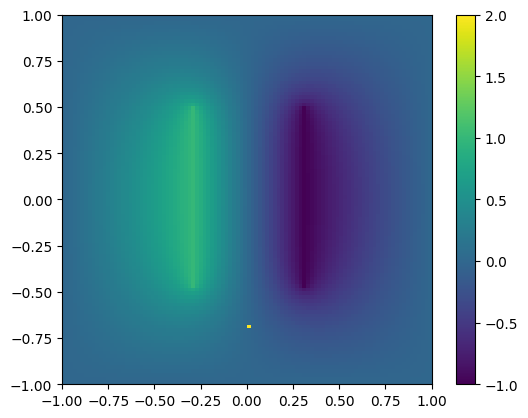

In [120]:


v_0 = np.zeros((100,100))
v_0[20:80, 40] = 1
v_0[20:80, 60] = -1


V_plot, steps, ggtime = SOR(arena, d,100,1.5,10E-4)
# for d=5 punktverdi = 0.0276911
# for d=15 punktverdi = 0.02274350111
dxx, dyy = np.gradient(V_plot)
print(np.sqrt(dxx[84,50]**2 + dyy[84,50]**2))
plt.imshow(V_plot, extent=(-1,1,-1,1))
plt.colorbar()

# b)
Fra potensialet, finn det elektriske feltet i boksen og plott dette som en quiverplot. Hint: Bruk np.gradient for  ̊a finne gradienten til V .

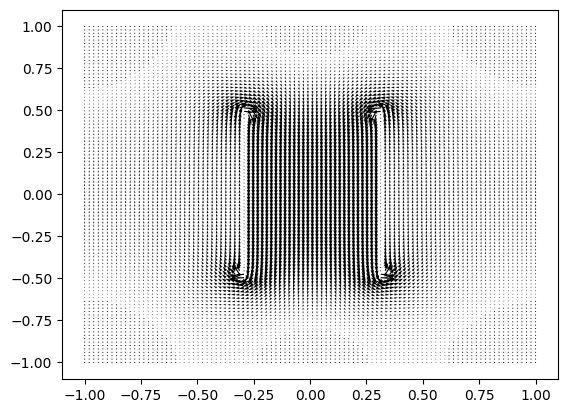

In [113]:
dx, dy = np.gradient(V_plot)
plt.quiver(xv, yv, dx, dy)

# c)
Plott den elektriske feltstyrken i punktet (0, 0.6) som funksjon av plateseparasjon d.

Her er (84, 50) tilsvarende (0, 0.6)

In [114]:
arenas = []
for i in range(1,49):
    arena, _, _ = make_arena(i, 1)
    arenas.append(arena)

#arenas = make_arenas(ranges, 1)

In [115]:
def calculate_field_at_point(arenas):
     numbers = []
     counts = []
     for count, elem in enumerate(tqdm(arenas), 1):
         V_plot, steps, ggtime = SOR(elem, count,100,1.5,10E-4)
         dx, dy = np.gradient(V_plot)
         numbers.append(np.sqrt(dx[84,50]**2 + dy[84,50]**2))
         counts.append(count)

     return numbers, counts

In [116]:
y, x = calculate_field_at_point(arenas)

100%|██████████| 48/48 [03:51<00:00,  4.82s/it]


In [117]:
print(y)

[0.022239495590642894, 0.024366591202826138, 0.025945376378417727, 0.027034097600479003, 0.02769116219724056, 0.02797921089095465, 0.0279616122230549, 0.027700010393462343, 0.02724985014456438, 0.02665904465725684, 0.025967153887498085, 0.02520716897434299, 0.024403897450028328, 0.023577785307812182, 0.022743501110918343, 0.021912234012549527, 0.02109285613443975, 0.020291501553104482, 0.019512384329368488, 0.018758437661615696, 0.01803053375598468, 0.017328841585952066, 0.01665233529652182, 0.0160009011362689, 0.015374215709481618, 0.014771994850316097, 0.014193529906469226, 0.013637998630969081, 0.013104369489291424, 0.012591564064172776, 0.0120985232199923, 0.011623965699250902, 0.011166985403800607, 0.010726155091893565, 0.010300682107774337, 0.009889194336923524, 0.009490718722876821, 0.009104153009104336, 0.008728376937332711, 0.008362508721414698, 0.008004802040761922, 0.0076545028579149575, 0.007310180005073907, 0.006969417047868271, 0.006630342415818411, 0.0062900132768947195,

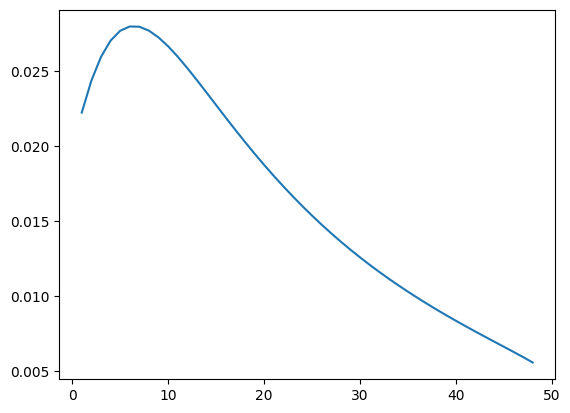

In [118]:
plt.plot(x,y)